In [0]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn import metrics

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [0]:
import pandas as pd
# Loading data into dataframe train
train = pd.read_csv("train.csv")
#sample_submission = pd.read_csv("sample_submission.csv")
#test = pd.read_csv("test.csv")

# Checking data of dataframe train
pd.set_option('display.max_columns', None)
train.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,Bassoon,a2e1bf0b1,ae6737c29,8c30b9b0b,690411ac0,05afc0f8b,2.0,Expert,Hot,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,Bassoon,87a5be0d7,cdc35bd00,1cba571fa,b8e63cace,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,Bassoon,104aee31d,2a50808ba,81d67e1bb,bd9643a20,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,Oboe,024efa364,a4a81ab45,429114096,94c5fd40c,NaN,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,Theremin,9fa084b36,e7aa94f40,56d35c774,0279391c5,79b29d54c,3.0,Contributor,Lava Hot,n,I,OZ,1.0,8.0,1


In [0]:
# Checking shape of dataframe train
train.shape

(600000, 25)

In [0]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

resumetable(train)

Dataset Shape: (600000, 25)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,int64,0,600000,0,1,2,19.19
1,bin_0,float64,17894,2,0,1,0,0.44
2,bin_1,float64,18003,2,0,1,1,0.69
3,bin_2,float64,17930,2,0,0,0,0.85
4,bin_3,object,18014,2,F,F,F,0.95
5,bin_4,object,18047,2,N,Y,N,1.00
6,nom_0,object,18252,3,Red,Red,Red,1.31
7,nom_1,object,18156,6,Trapezoid,Star,NaN,2.27
8,nom_2,object,18035,6,Hamster,Axolotl,Hamster,2.27
9,nom_3,object,18121,6,Russia,NaN,Canada,2.27


In [0]:
train_X = train.iloc[:,:24].copy() 
train_X.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0


In [0]:
train_y = train.iloc[:,24:].copy()
train_y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [0]:
# Checking information of columns of dataframe train
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 24 columns):
id       600000 non-null int64
bin_0    582106 non-null float64
bin_1    581997 non-null float64
bin_2    582070 non-null float64
bin_3    581986 non-null object
bin_4    581953 non-null object
nom_0    581748 non-null object
nom_1    581844 non-null object
nom_2    581965 non-null object
nom_3    581879 non-null object
nom_4    581965 non-null object
nom_5    582222 non-null object
nom_6    581869 non-null object
nom_7    581997 non-null object
nom_8    582245 non-null object
nom_9    581927 non-null object
ord_0    581712 non-null float64
ord_1    581959 non-null object
ord_2    581925 non-null object
ord_3    582084 non-null object
ord_4    582070 non-null object
ord_5    582287 non-null object
day      582048 non-null float64
month    582012 non-null float64
dtypes: float64(6), int64(1), object(17)
memory usage: 109.9+ MB


In [0]:
# Checking summary statistics of dataframe train
train_X.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month
count,600000.000000,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000
mean,299999.500000,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317
std,173205.225094,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,149999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,299999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000
75%,449999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000
max,599999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000


In [0]:
# Checking uniqueness of all the columns of dataframe train
clms = []
for x in train_X.columns.tolist():
    if len(train_X[x].unique()) == len(train_X[x]):
        clms.append(x)
    else:
        pass
        
print("List of unique value columns: {}".format(clms))

List of unique value columns: ['id']


In [0]:
# Removing Unique value columns of dataframe train
train_X = train_X.drop(clms, axis=1)

In [0]:
# Checking list of columns of dataframe train
train_X.columns.tolist()

['bin_0',
 'bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9',
 'ord_0',
 'ord_1',
 'ord_2',
 'ord_3',
 'ord_4',
 'ord_5',
 'day',
 'month']

In [0]:
#Values in columns
#bin_0 0.0, 1.0 
#bin_1 0.0, 1.0 
#bin_2 0.0, 1.0 
#bin_3 F, T but object
#bin_4 N, Y
#nom_0 Red Blue Green
#nom_1 Triangle, Polygon, Trapezoid, Circle, Square, Star 
#nom_2 Hamster, Axolotl, Lion, Dog, Cat, Snake
#nom_3 India, Costa Rica, Russia, Finland, Canada, China 
#nom_4 Theremin, Bassoon, Oboe, Piano 
#nom_5 fc8fc7e56, 360a16627, 423976253..............
#nom_6 ea8c5e181..............
#nom_7 4ae48e857..............
#nom_8 7d7c02c57................
#nom_9 8f3276a6e...........
#ord_0 1.0, 3.0, 2.0
#ord_1 Novice, Expert, Contributor, Grandmaster, Master
#ord_2 Freezing, Warm, Cold, Boiling Hot, Hot, Lava Hot
#ord_3 n, a, m.............
#ord_4 N, P, Y...............
#ord_5 Fl, DN, Sz..... 
#day 3.0, 5.0, 6.0, 7.0, 1.0, 2.0, 4.0
#month 1.0, 2.0.........11.0,12.0

In [0]:
# Creating function to check missing values in each column of dataframe train
def missing_value(X):
    missing_data = round(100*(X.isnull().sum()/len(X.index)), 2)
    missing_df = pd.DataFrame(missing_data)
    missing_df = missing_df.reset_index()
    missing_df = missing_df.rename(columns={"index":"Columns", 0:"Missing Values(%)"})
    missing_df  = missing_df.sort_values(by="Missing Values(%)", ascending = False)
    return(missing_df[missing_df["Missing Values(%)"] > 0.00])
missing_value(train_X)

,Columns,Missing Values(%)
15,ord_0,3.05
5,nom_0,3.04
6,nom_1,3.03
11,nom_6,3.02
8,nom_3,3.02
17,ord_2,3.01
16,ord_1,3.01
4,bin_4,3.01
7,nom_2,3.01
9,nom_4,3.01


In [0]:
# Checking howmuch rows we can loose if we delete rows with missing values
round(100*((train_X.isnull().any(axis=1).sum())/len(train_X.index)), 2)

50.33

In [0]:
train_X['nom_0'].value_counts('category')

Red      0.555715
Blue     0.353866
Green    0.090419
Name: nom_0, dtype: float64

In [0]:
train_X.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0


In [0]:
# Encoding for binary variables
train_X['bin_3'] = train_X['bin_3'].map({'T': 1, 'F': 0})
train_X['bin_4'] = train_X['bin_4'].map({'Y': 1, 'N': 0})

# Encoding for nominal variables
nom_0_1_2_3 = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
for x in nom_0_1_2_3:
  train_X_new = pd.get_dummies(train_X[x],drop_first=True)
  train_X = pd.concat([train_X,train_X_new],axis=1)
  train_X = train_X.drop([x],axis=1)

# Encoding for ordinal variables
mapper = {'Novice': 0, 'Contributor': 1, 'Expert': 2, 'Master': 3, 'Grandmaster': 4}
train_X['ord_1'] = train_X['ord_1'].apply(lambda x: mapper[x] if x in mapper else x)
mapper = {'Freezing': 0, 'Cold': 1, 'Warm': 2, 'Hot': 3, 'Boiling Hot': 4, 'Lava Hot': 5}
train_X['ord_2'] = train_X['ord_2'].apply(lambda x: mapper[x] if x in mapper else x)
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
mapper = {f:n for n, f in enumerate(sorted(labels))}
train_X['ord_3'] = train_X['ord_3'].apply(lambda x: mapper[x] if x in mapper else x)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
mapper = {f:n for n, f in enumerate(sorted(labels))}
train_X['ord_4'] = train_X['ord_4'].apply(lambda x: mapper[x] if x in mapper else x)
labels = ['AG', 'AI', 'AU', 'AW', 'Ay', 'BL', 'BX', 'Bx', 'CN', 'CU', 'Cn', 'DI', 'DN', 'DR', 'DT', 'Dj', 'Dn', 'EC', 'Ey', 'FB', 'FH', 'Fl', 'GZ', 'HF', 'HK', 'HO', 'Hk', 'IA', 'IS', 'Ib', 'In', 'Io', 'Iq', 'JQ', 'JT', 'Ji', 'Kq', 'LS', 'LY', 'Lo', 'MF', 'MU', 'MV', 'MX', 'Mg', 'Mq', 'NS', 'NT', 'Nh', 'OM', 'OZ', 'Oe', 'Ox', 'PG', 'PS', 'Pk', 'Pw', 'QV', 'Qm', 'RB', 'RD', 'RT', 'RV', 'Re', 'Rj', 'Ro', 'Rv', 'Rz', 'SL', 'SS', 'Sk', 'Sz', 'TH', 'TL', 'TP', 'TZ', 'Tg', 'Ty', 'Tz', 'US', 'UV', 'WC', 'WW', 'Wr', 'XC', 'XI', 'XM', 'XR', 'XU', 'YJ', 'Yb', 'Yi', 'Yr', 'Zv', 'aA', 'aE', 'al', 'be', 'cR', 'cY', 'cg', 'cy', 'dh', 'dp', 'eA', 'eN', 'ep', 'fF', 'fO', 'fV', 'fe', 'gK', 'gL', 'gV', 'gc', 'gj', 'gt', 'hG', 'hT', 'ht', 'hx', 'iS', 'iv', 'ja', 'jf', 'jp', 'kB', 'kP', 'kT', 'kv', 'lA', 'lR', 'lS', 'ly', 'mD', 'mP', 'mX', 'mi', 'mo', 'nS', 'ne', 'nf', 'nj', 'nn', 'oI', 'oJ', 'oU', 'oh', 'ok', 'pB', 'pE', 'pT', 'pZ', 'pl', 'qN', 'qP', 'rA', 'rM', 'rg', 'rl', 'sF', 'sY', 'sc', 'sf', 'tT', 'th', 'tn', 'uI', 'uP', 'uQ', 'uW', 'uZ', 'ur', 'us', 'vQ', 'vq', 'vw', 'vx', 'wJ', 'wU', 'wa', 'xB', 'xF', 'xG', 'yE', 'yK', 'zc', 'ze', 'zf', 'zp']
mapper = {f:n for n, f in enumerate(sorted(labels))}
train_X['ord_5'] = train_X['ord_5'].apply(lambda x: mapper[x] if x in mapper else x)

In [0]:
# Label encoding for nom_5, nom_6, nom_7, nom_8 and nom_9
from sklearn.preprocessing import LabelEncoder
train_X_label = train_X[["nom_5", "nom_6", "nom_7", "nom_8", "nom_9"]].copy()
original = train_X_label.copy()
mask = train_X_label.isnull()
train_X_label = train_X_label.astype(str).apply(LabelEncoder().fit_transform)
train_X_label = train_X_label.where(~mask, original)
train_X_label = train_X_label.rename(columns={"nom_5":"nom_5_labeled", "nom_6":"nom_6_labeled", "nom_7":"nom_7_labeled", "nom_8":"nom_8_labeled", "nom_9":"nom_9_labeled"})

#concatenating label columns to dataframe
train_X = pd.concat([train_X, train_X_label], axis = 1)
train_X.tail()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,Green,Red,Polygon,Square,Star,Trapezoid,Triangle,Cat,Dog,Hamster,Lion,Snake,China,Costa Rica,Finland,India,Russia,Oboe,Piano,Theremin,nom_5_labeled,nom_6_labeled,nom_7_labeled,nom_8_labeled,nom_9_labeled
599995,0.0,1.0,0.0,1.0,0.0,014770cf0,da5014b01,a7059911d,158183c63,015c63324,3.0,0.0,0.0,0.0,17.0,22.0,5.0,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,1302,164,13,13
599996,1.0,0.0,0.0,1.0,1.0,NaN,2023ed4ed,83bdea3a5,e9fde8fa8,a02ae6a63,2.0,0.0,4.0,13.0,13.0,163.0,NaN,3.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,NaN,208,127,204,1402
599997,0.0,0.0,0.0,0.0,1.0,c7dc5d460,5d7d341ac,114b1dbf3,cccbca824,40f9610c1,2.0,1.0,0.0,13.0,7.0,42.0,7.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,957,569,14,178,571
599998,1.0,1.0,0.0,0.0,1.0,4d7780407,209e1054e,fba315672,4164322bd,c1a8374a0,1.0,3.0,2.0,12.0,23.0,18.0,1.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,347,212,218,52,1711
599999,0.0,0.0,0.0,1.0,0.0,17f06e644,f7706ca16,67a8d4ebb,NaN,e2aea7784,1.0,1.0,4.0,1.0,14.0,167.0,5.0,8.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,126,1478,97,NaN,1973


In [0]:
# Hashing encoding for cardinality features, credit to https://www.kaggle.com/discdiver/category-encoders-examples
import category_encoders as ce
nom_list = ["nom_5", "nom_6", "nom_7", "nom_8", "nom_9"]
ce_hash = ce.HashingEncoder(cols = nom_list)
train_X = ce_hash.fit_transform(train_X)

In [0]:
# converting columns to numeric type
import numpy as np
for x in train_X.columns:
    train_X[x] = train_X[x].fillna(999999)
    train_X[x] = train_X[x].astype('int32')
    train_X[x] = train_X[x].apply(lambda x: np.nan if x == 999999 else x)
train_X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,Green,Red,Polygon,Square,Star,Trapezoid,Triangle,Cat,Dog,Hamster,Lion,Snake,China,Costa Rica,Finland,India,Russia,Oboe,Piano,Theremin,nom_5_labeled,nom_6_labeled,nom_7_labeled,nom_8_labeled,nom_9_labeled
0,0,0,0,1,2,0,0,2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,2.0,20.0,56.0,6.0,3.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1059.0,1013.0,87.0,1.0,27.0
1,0,0,1,1,0,1,2,0,1.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,4.0,23.0,150.0,7.0,7.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,210.0,359.0,27.0,69.0,2112.0
2,1,1,0,1,0,1,1,0,0.0,1.0,0.0,0.0,0.0,3.0,NaN,0.0,13.0,15.0,105.0,5.0,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,860.0,694.0,90.0,102.0,NaN
3,0,1,1,1,0,0,2,0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,2.0,NaN,3.0,3.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,477.0,241.0,51.0,170.0,2167.0
4,1,2,1,0,0,0,0,1,0.0,NaN,0.0,1.0,0.0,3.0,4.0,1.0,7.0,2.0,50.0,5.0,12.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,556.0,361.0,182.0,NaN,1747.0


In [0]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 46 columns):
col_0            600000 non-null int64
col_1            600000 non-null int64
col_2            600000 non-null int64
col_3            600000 non-null int64
col_4            600000 non-null int64
col_5            600000 non-null int64
col_6            600000 non-null int64
col_7            600000 non-null int64
bin_0            582106 non-null float64
bin_1            581997 non-null float64
bin_2            582070 non-null float64
bin_3            581986 non-null float64
bin_4            581953 non-null float64
ord_0            581712 non-null float64
ord_1            581959 non-null float64
ord_2            581925 non-null float64
ord_3            582084 non-null float64
ord_4            582070 non-null float64
ord_5            582287 non-null float64
day              582048 non-null float64
month            582012 non-null float64
Green            600000 non-null int64
Red  

In [0]:
from fancyimpute import IterativeImputer
# Preserving the column names
train_X_col = train_X.columns
train_X_clean = pd.DataFrame(IterativeImputer().fit_transform(train_X))
train_X_clean.columns = train_X_col
train_X_clean.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,Green,Red,Polygon,Square,Star,Trapezoid,Triangle,Cat,Dog,Hamster,Lion,Snake,China,Costa Rica,Finland,India,Russia,Oboe,Piano,Theremin,nom_5_labeled,nom_6_labeled,nom_7_labeled,nom_8_labeled,nom_9_labeled
0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.000000,3.0,2.0,20.0,56.000000,6.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1059.0,1013.0,87.0,1.000000,27.000000
1,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.000000,1.000000,0.0,0.0,1.0,3.0,4.000000,2.0,4.0,23.0,150.000000,7.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,210.0,359.0,27.0,69.000000,2112.000000
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.0,3.0,1.735173,0.0,13.0,15.0,105.000000,5.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,860.0,694.0,90.0,102.000000,1119.767423
3,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.099365,0.000000,0.0,0.0,0.0,1.0,0.000000,5.0,0.0,2.0,90.893195,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,477.0,241.0,51.0,170.000000,2167.000000
4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.185513,0.0,1.0,0.0,3.0,4.000000,1.0,7.0,2.0,50.000000,5.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0,361.0,182.0,113.974395,1747.000000


In [0]:
# Checking the target positive Rate
target = (sum(train_y['target'])/len(train_y['target'].index))*100
target

18.7205

In [0]:
train_X_clean.describe(percentiles=[0.01, 0.02, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.93, 0.95, 0.97, 0.999])

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,Green,Red,Polygon,Square,Star,Trapezoid,Triangle,Cat,Dog,Hamster,Lion,Snake,China,Costa Rica,Finland,India,Russia,Oboe,Piano,Theremin,nom_5_labeled,nom_6_labeled,nom_7_labeled,nom_8_labeled,nom_9_labeled
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,0.784365,0.534627,0.651152,0.638187,0.605637,0.568533,0.594442,0.623058,0.092302,0.185533,0.278703,0.370753,0.463282,1.948223,1.719417,2.083059,6.810761,12.307613,90.935976,4.112769,6.371318,0.087668,0.538810,0.254272,0.044172,0.023592,0.199063,0.273650,0.043793,0.174708,0.274828,0.199173,0.023573,0.023862,0.253045,0.174335,0.274782,0.199733,0.083327,0.044515,0.514368,600.075423,761.831792,109.048801,113.063064,1106.493937
std,0.812368,0.689716,0.751421,0.745327,0.728378,0.709004,0.722718,0.737458,0.285102,0.382853,0.441612,0.475702,0.491095,0.840790,1.393952,1.660796,4.804414,7.438075,54.502100,2.003766,3.406721,0.282812,0.498492,0.435451,0.205477,0.151773,0.399296,0.445832,0.204635,0.379718,0.446428,0.399379,0.151716,0.152618,0.434757,0.379398,0.446405,0.399800,0.276376,0.206236,0.499794,349.121433,425.966002,63.499558,63.236230,626.458258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,14.000000,2.000000,3.000000,22.000000
2%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,33.000000,3.000000,4.000000,40.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,86.000000,9.000000,12.000000,119.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,15.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,167.000000,20.000000,22.000000,239.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

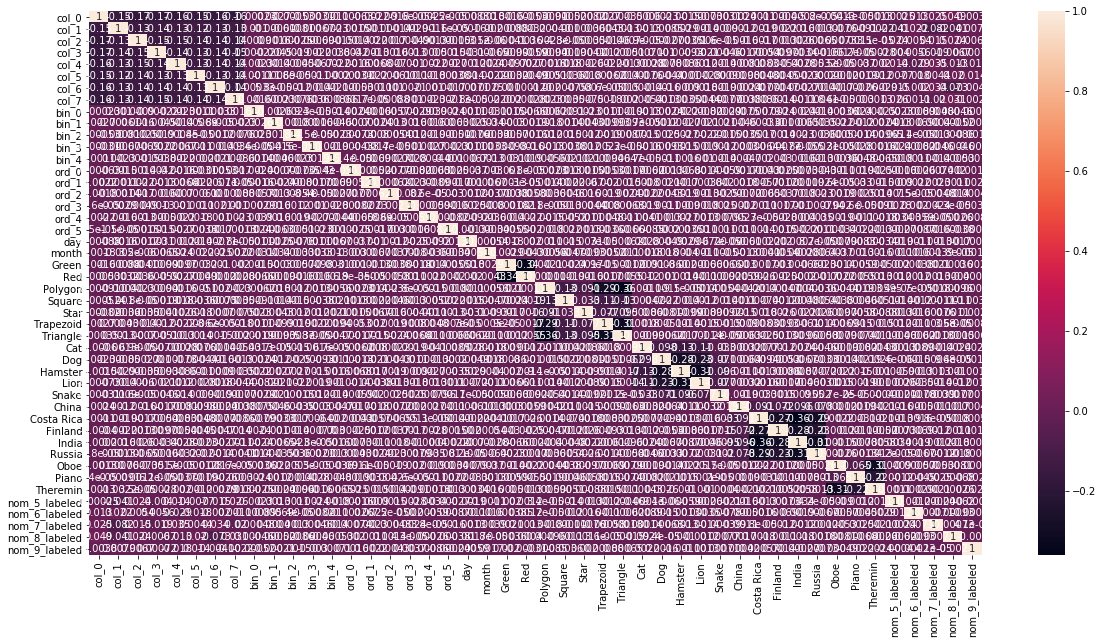

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train_X_clean.corr(),annot = True)

In [0]:
missing_value(train_X_clean)

,Columns,Missing Values(%)


In [0]:
# Transfer the cyclical features into two dimensional sin-cos features
def date_cyc_enc(df, col, max_vals):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_vals)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_vals)
    return df

train_X_clean = date_cyc_enc(train_X_clean, 'day', 7)
train_X_clean = date_cyc_enc(train_X_clean, 'month', 12)

# Making frequency features
for col in train_X_clean.columns:
    enc_nom_1 = (train_X_clean.groupby(col).size()) / len(train_X_clean)
    train_X_clean[f'freq_{col}'] = train_X_clean[col].apply(lambda x : enc_nom_1[x])

In [0]:
# Function to reduce the dataframe size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

##################################
train_X_clean = reduce_mem_usage(train_X_clean)
train_y = reduce_mem_usage(train_y)

Mem. usage decreased to 114.44 Mb (75.0% reduction)
Mem. usage decreased to  0.57 Mb (87.5% reduction)


In [0]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X_clean,train_y, train_size=0.7,test_size=0.3, random_state=100)

In [0]:
###############################
# use this code when you are new test data. It will use entire data rather than splitted data
#X_train = train_X_clean.copy()
#y_train = train_y.copy()
#print(X_train.shape)
#print(y_train.shape)
################################
#Also change following line in XGBRegressor
#y_preds = np.zeros(X_test.shape[0])
#to
##y_preds = np.zeros(test.shape[0])


(600000, 100)
(600000, 1)


In [0]:
# Credit goes to https://www.kaggle.com/kabure/eda-feat-engineering-encode-conquer
# Creating pipeline to evaluate different models and to choose the best model
clfs = []
seed = 42

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier", XGBClassifier()))

# clfs.append(("KNN", 
#              Pipeline([("Scaler", StandardScaler()),
#                        ("KNN", KNeighborsClassifier(n_neighbors=5))])))

clfs.append(("DecisionTreeClassifier", DecisionTreeClassifier()))

clfs.append(("RandomForestClassifier", RandomForestClassifier(n_estimators=100)))

clfs.append(("GradientBoostingClassifier", GradientBoostingClassifier(n_estimators=100)))

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",ExtraTreesClassifier()))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'roc_auc'
n_folds = 7

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, shuffle=False, random_state=seed)
    
    cv_results = cross_val_score(model, 
                                 X_train.values, y_train, 
                                 cv= kfold, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithm", fontsize=20) 
ax.set_ylabel("Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()


In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.metrics import make_scorer
## Hyperopt modules
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial
import xgboost as xgb
import gc

import time
def objective(params):
    time1 = time.time()
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'subsample': "{:.2f}".format(params['subsample']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'reg_lambda': "{:.3f}".format(params['reg_lambda']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'num_leaves': '{:.3f}'.format(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'min_child_samples': '{:.3f}'.format(params['min_child_samples']),
        'feature_fraction': '{:.3f}'.format(params['feature_fraction']),
        'bagging_fraction': '{:.3f}'.format(params['bagging_fraction'])
    }

    print("\n############## New Run ################")
    print(f"params = {params}")
    FOLDS = 12
    count=1
    kf = KFold(n_splits=FOLDS, shuffle=False, random_state=42)

    # tss = TimeSeriesSplit(n_splits=FOLDS)
    y_preds = np.zeros(X_test.shape[0]) #For the shape of test data, specially rows
    # y_oof = np.zeros(X_train.shape[0])
    score_mean = 0
    for tr_idx, val_idx in kf.split(X_train, y_train):
        clf = xgb.XGBClassifier(
            n_estimators=500, random_state=4, 
            verbose=True, 
            tree_method='gpu_hist', 
            **params
        )

        X_tr, X_vl = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
        y_tr, y_vl = y_train.iloc[tr_idx], y_train.iloc[val_idx]
        
        clf.fit(X_tr, y_tr)
        #y_pred_train = clf.predict_proba(X_vl)[:,1]
        #print(y_pred_train)
        score = make_scorer(roc_auc_score, needs_proba=True)(clf, X_vl, y_vl)
        # plt.show()
        score_mean += score
        print(f'{count} CV - score: {round(score, 4)}')
        count += 1
    time2 = time.time() - time1
    print(f"Total Time Run: {round(time2 / 60,2)}")
    gc.collect()
    print(f'Mean ROC_AUC: {score_mean / FOLDS}')
    del X_tr, X_vl, y_tr, y_vl, clf, score
    
    return -(score_mean / FOLDS)

space = {
    # The maximum depth of a tree, same as GBM.
    # Used to control over-fitting as higher depth will allow model 
    # to learn relations very specific to a particular sample.
    # Should be tuned using CV.
    # Typical values: 3-10
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    
    # reg_alpha: L1 regularization term. L1 regularization encourages sparsity 
    # (meaning pulling weights to 0). It can be more useful when the objective
    # is logistic regression since you might need help with feature selection.
    'reg_alpha':  hp.uniform('reg_alpha', 0.01, 0.4),
    
    # reg_lambda: L2 regularization term. L2 encourages smaller weights, this
    # approach can be more useful in tree-models where zeroing 
    # features might not make much sense.
    'reg_lambda': hp.uniform('reg_lambda', 0.01, .4),
    
    # eta: Analogous to learning rate in GBM
    # Makes the model more robust by shrinking the weights on each step
    # Typical final values to be used: 0.01-0.2
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.15),
    
    # colsample_bytree: Similar to max_features in GBM. Denotes the 
    # fraction of columns to be randomly samples for each tree.
    # Typical values: 0.5-1
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1),
    
    # A node is split only when the resulting split gives a positive
    # reduction in the loss function. Gamma specifies the 
    # minimum loss reduction required to make a split.
    # Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
    'gamma': hp.uniform('gamma', 0.01, .7),
    
    # more increases accuracy, but may lead to overfitting.
    # num_leaves: the number of leaf nodes to use. Having a large number 
    # of leaves will improve accuracy, but will also lead to overfitting.
    'num_leaves': hp.choice('num_leaves', list(range(20, 200, 5))),
    
    # specifies the minimum samples per leaf node.
    # the minimum number of samples (data) to group into a leaf. 
    # The parameter can greatly assist with overfitting: larger sample
    # sizes per leaf will reduce overfitting (but may lead to under-fitting).
    'min_child_samples': hp.choice('min_child_samples', list(range(100, 250, 10))),
    
    # subsample: represents a fraction of the rows (observations) to be 
    # considered when building each subtree. Tianqi Chen and Carlos Guestrin
    # in their paper A Scalable Tree Boosting System recommend 
    'subsample': hp.choice('subsample', [.5, 0.6, 0.7, .8]),
    
    # randomly select a fraction of the features.
    # feature_fraction: controls the subsampling of features used
    # for training (as opposed to subsampling the actual training data in 
    # the case of bagging). Smaller fractions reduce overfitting.
    'feature_fraction': hp.uniform('feature_fraction', 0.4, .8),
    
    # randomly bag or subsample training data.
    'bagging_fraction': hp.uniform('bagging_fraction', 0.4, .9)
    
    # bagging_fraction and bagging_freq: enables bagging (subsampling) 
    # of the training data. Both values need to be set for bagging to be used.
    # The frequency controls how often (iteration) bagging is used. Smaller
    # fractions and frequencies reduce overfitting.
}

In [0]:
# HyperOpt Run
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30, 
            # trials=trials
           )


############## New Run ################
params = {'max_depth': 6, 'gamma': '0.041', 'subsample': '0.60', 'reg_alpha': '0.166', 'reg_lambda': '0.333', 'learning_rate': '0.027', 'num_leaves': '75.000', 'colsample_bytree': '0.772', 'min_child_samples': '200.000', 'feature_fraction': '0.659', 'bagging_fraction': '0.714'}
1 CV - score: 0.766
2 CV - score: 0.7628
3 CV - score: 0.7682
4 CV - score: 0.7619
5 CV - score: 0.7662
6 CV - score: 0.77
7 CV - score: 0.7665
8 CV - score: 0.7655
9 CV - score: 0.7687
10 CV - score: 0.7656
11 CV - score: 0.7683
12 CV - score: 0.763
Total Time Run: 4.1
Mean ROC_AUC: 0.7660647626410308

############## New Run ################
params = {'max_depth': 3, 'gamma': '0.421', 'subsample': '0.50', 'reg_alpha': '0.310', 'reg_lambda': '0.238', 'learning_rate': '0.031', 'num_leaves': '195.000', 'colsample_bytree': '0.914', 'min_child_samples': '100.000', 'feature_fraction': '0.770', 'bagging_fraction': '0.750'}
1 CV - score: 0.7577
2 CV - score: 0.7538
3 CV - score:

In [0]:
# Best parameters
best_params = space_eval(space, best)
best_params['max_depth'] = int(best_params['max_depth'])
best_params

{'bagging_fraction': 0.6952873747799342,
 'colsample_bytree': 0.8092976495530129,
 'feature_fraction': 0.6570558931098327,
 'gamma': 0.3207740367472718,
 'learning_rate': 0.08407298293792964,
 'max_depth': 6,
 'min_child_samples': 200,
 'num_leaves': 80,
 'reg_alpha': 0.18314080224316936,
 'reg_lambda': 0.31077931397537967,
 'subsample': 0.8}

In [0]:
# Predicting with best params Xgb
clf = xgb.XGBClassifier(
    n_estimators=500,
    **best_params,
    tree_method='gpu_hist'
)

clf.fit(X_train, y_train)

y_preds = clf.predict_proba(X_test)[:,1] 

In [0]:
#Feature Importance of Xgb model
feature_important = clf.get_booster().get_score(importance_type="weight")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

# Top 10 features
data.head(20)

,score
nom_8_labeled,1780
freq_nom_8_labeled,1767
freq_nom_7_labeled,1745
nom_7_labeled,1684
ord_5,1543
nom_9_labeled,1395
nom_5_labeled,1247
freq_nom_9_labeled,1228
freq_nom_5_labeled,1157
nom_6_labeled,1145


In [0]:
# Prediction and evalution on test set
y_test_pred_final = pd.DataFrame(data=y_preds, columns=["target_prob"])
y_test_reset = y_test.reset_index(drop=True)
y_test_pred_final["target"] = y_test_reset["target"]

print("ROC AUC:", metrics.roc_auc_score(y_test_pred_final["target"], y_test_pred_final["target_prob"]))

ROC AUC: 0.775985114098506


Now we are using kaggle test data

In [0]:
# Loading kaggle test data into dataframe test
test = pd.read_csv("/content/drive/My Drive/test.csv")

# Checking data of dataframe test
pd.set_option('display.max_columns', None)
test.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,Piano,52f6dd16c,147d704e4,8d857a0a1,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,Bassoon,691ebeae8,8653dcc2e,67a8d4ebb,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,Theremin,81f792c16,6cdda499e,69403e18c,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,Bassoon,c9134205b,acbca4827,cb681246b,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,Theremin,f0f100f57,6f800b9af,cd9feb5c6,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0
5,600005,0.0,0.0,0.0,NaN,Y,Red,Star,Axolotl,Costa Rica,Theremin,ce3da7e28,f8e870910,598080a91,745b909d1,30db15878,3.0,Grandmaster,Cold,e,Y,th,5.0,6.0
6,600006,0.0,0.0,0.0,F,Y,Red,Trapezoid,Axolotl,Russia,Bassoon,fb772f7e1,08dd65794,a7059911d,75a957c6d,ecbea3fb9,2.0,Novice,Lava Hot,n,U,RD,1.0,6.0
7,600007,0.0,0.0,1.0,F,N,Red,Trapezoid,Axolotl,India,Oboe,edd08fbe3,5473c547f,8c9b654fe,5bdcf7324,48ca7cb85,1.0,Grandmaster,Boiling Hot,f,NaN,pT,2.0,6.0
8,600008,0.0,0.0,0.0,T,Y,Red,Triangle,Dog,Russia,Bassoon,c0192e379,88794687e,3599d0255,8aeac2495,e663c4eec,2.0,Master,Warm,c,Y,nj,5.0,5.0
9,600009,0.0,0.0,0.0,F,N,Green,Polygon,Lion,Costa Rica,Bassoon,b2d1ecfad,0f59828ee,3ef3018d3,220190c9e,0ce4b3b6e,2.0,Novice,Hot,k,M,dp,7.0,2.0


In [0]:
# Checking shape of dataframe test
test.shape

(400000, 24)

In [0]:
# Checking information of columns of dataframe test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 24 columns):
id       400000 non-null int64
bin_0    388099 non-null float64
bin_1    387962 non-null float64
bin_2    388028 non-null float64
bin_3    388049 non-null object
bin_4    388049 non-null object
nom_0    387938 non-null object
nom_1    388053 non-null object
nom_2    387821 non-null object
nom_3    387824 non-null object
nom_4    388007 non-null object
nom_5    388088 non-null object
nom_6    387988 non-null object
nom_7    387997 non-null object
nom_8    388044 non-null object
nom_9    387940 non-null object
ord_0    388107 non-null float64
ord_1    387833 non-null object
ord_2    387895 non-null object
ord_3    387947 non-null object
ord_4    388067 non-null object
ord_5    387953 non-null object
day      387975 non-null float64
month    388016 non-null float64
dtypes: float64(6), int64(1), object(17)
memory usage: 73.2+ MB


In [0]:
# seperating id column
ids = test.iloc[:,:1].copy() 
test = test.iloc[:,1:]

In [0]:
ids.head()

,id
0,600000
1,600001
2,600002
3,600003
4,600004


In [0]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,Piano,52f6dd16c,147d704e4,8d857a0a1,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,Bassoon,691ebeae8,8653dcc2e,67a8d4ebb,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,Theremin,81f792c16,6cdda499e,69403e18c,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,Bassoon,c9134205b,acbca4827,cb681246b,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,Theremin,f0f100f57,6f800b9af,cd9feb5c6,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [0]:
missing_value(test)

,Columns,Missing Values(%)
7,nom_2,3.04
8,nom_3,3.04
16,ord_1,3.04
17,ord_2,3.03
5,nom_0,3.02
14,nom_9,3.02
21,day,3.01
20,ord_5,3.01
18,ord_3,3.01
1,bin_1,3.01


In [0]:
# Encoding
test['bin_3'] = test['bin_3'].map({'T': 1, 'F': 0})
test['bin_4'] = test['bin_4'].map({'Y': 1, 'N': 0})

nom_0_1_2_3 = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
for x in nom_0_1_2_3:
  test_new = pd.get_dummies(test[x],drop_first=True)
  test = pd.concat([test,test_new],axis=1)
  test = test.drop([x],axis=1)

mapper = {'Novice': 0, 'Contributor': 1, 'Expert': 2, 'Master': 3, 'Grandmaster': 4}
test['ord_1'] = test['ord_1'].apply(lambda x: mapper[x] if x in mapper else x)
mapper = {'Freezing': 0, 'Cold': 1, 'Warm': 2, 'Hot': 3, 'Boiling Hot': 4, 'Lava Hot': 5}
test['ord_2'] = test['ord_2'].apply(lambda x: mapper[x] if x in mapper else x)
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
mapper = {f:n for n, f in enumerate(sorted(labels))}
test['ord_3'] = test['ord_3'].apply(lambda x: mapper[x] if x in mapper else x)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
mapper = {f:n for n, f in enumerate(sorted(labels))}
test['ord_4'] = test['ord_4'].apply(lambda x: mapper[x] if x in mapper else x)
labels = ['AG', 'AI', 'AU', 'AW', 'Ay', 'BL', 'BX', 'Bx', 'CN', 'CU', 'Cn', 'DI', 'DN', 'DR', 'DT', 'Dj', 'Dn', 'EC', 'Ey', 'FB', 'FH', 'Fl', 'GZ', 'HF', 'HK', 'HO', 'Hk', 'IA', 'IS', 'Ib', 'In', 'Io', 'Iq', 'JQ', 'JT', 'Ji', 'Kq', 'LS', 'LY', 'Lo', 'MF', 'MU', 'MV', 'MX', 'Mg', 'Mq', 'NS', 'NT', 'Nh', 'OM', 'OZ', 'Oe', 'Ox', 'PG', 'PS', 'Pk', 'Pw', 'QV', 'Qm', 'RB', 'RD', 'RT', 'RV', 'Re', 'Rj', 'Ro', 'Rv', 'Rz', 'SL', 'SS', 'Sk', 'Sz', 'TH', 'TL', 'TP', 'TZ', 'Tg', 'Ty', 'Tz', 'US', 'UV', 'WC', 'WW', 'Wr', 'XC', 'XI', 'XM', 'XR', 'XU', 'YJ', 'Yb', 'Yi', 'Yr', 'Zv', 'aA', 'aE', 'al', 'be', 'cR', 'cY', 'cg', 'cy', 'dh', 'dp', 'eA', 'eN', 'ep', 'fF', 'fO', 'fV', 'fe', 'gK', 'gL', 'gV', 'gc', 'gj', 'gt', 'hG', 'hT', 'ht', 'hx', 'iS', 'iv', 'ja', 'jf', 'jp', 'kB', 'kP', 'kT', 'kv', 'lA', 'lR', 'lS', 'ly', 'mD', 'mP', 'mX', 'mi', 'mo', 'nS', 'ne', 'nf', 'nj', 'nn', 'oI', 'oJ', 'oU', 'oh', 'ok', 'pB', 'pE', 'pT', 'pZ', 'pl', 'qN', 'qP', 'rA', 'rM', 'rg', 'rl', 'sF', 'sY', 'sc', 'sf', 'tT', 'th', 'tn', 'uI', 'uP', 'uQ', 'uW', 'uZ', 'ur', 'us', 'vQ', 'vq', 'vw', 'vx', 'wJ', 'wU', 'wa', 'xB', 'xF', 'xG', 'yE', 'yK', 'zc', 'ze', 'zf', 'zp']
mapper = {f:n for n, f in enumerate(sorted(labels))}
test['ord_5'] = test['ord_5'].apply(lambda x: mapper[x] if x in mapper else x)

In [0]:
# Label encoding for nom_5, nom_6, nom_7, nom_8 and nom_9
from sklearn.preprocessing import LabelEncoder
test_label = test[["nom_5", "nom_6", "nom_7", "nom_8", "nom_9"]].copy()
original = test_label.copy()
mask = test_label.isnull()
test_label = test_label.astype(str).apply(LabelEncoder().fit_transform)
test_label = test_label.where(~mask, original)
test_label = test_label.rename(columns={"nom_5":"nom_5_labeled", "nom_6":"nom_6_labeled", "nom_7":"nom_7_labeled", "nom_8":"nom_8_labeled", "nom_9":"nom_9_labeled"})

#concatenating label columns to dataframe
test = pd.concat([test, test_label], axis = 1)
test.tail()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,Green,Red,Polygon,Square,Star,Trapezoid,Triangle,Cat,Dog,Hamster,Lion,Snake,China,Costa Rica,Finland,India,Russia,Oboe,Piano,Theremin,nom_5_labeled,nom_6_labeled,nom_7_labeled,nom_8_labeled,nom_9_labeled
399995,0.0,0.0,1.0,1.0,0.0,92fb4c0dc,633bdcfd0,3ef3018d3,c1a4acfaf,45a68dd2e,2.0,2.0,2.0,13.0,17.0,103.0,2.0,12.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,700,604,57,171,613
399996,0.0,0.0,0.0,0.0,0.0,8bd03e713,7c241cd40,f74f0b894,220190c9e,e48348d66,1.0,1.0,NaN,13.0,23.0,79.0,1.0,5.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,667,773,216,29,1984
399997,0.0,0.0,1.0,1.0,0.0,6924d999b,18d43aee8,3afd3697d,cc5495ab3,47021df0d,1.0,4.0,4.0,12.0,15.0,73.0,1.0,6.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,486,165,52,177,629
399998,0.0,0.0,0.0,0.0,1.0,3e0230528,0c073adc7,3600c6e91,32b33a4b4,e4bf32721,3.0,0.0,5.0,7.0,11.0,11.0,2.0,11.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,290,88,49,44,1985
399999,0.0,0.0,1.0,0.0,0.0,0568087f1,29b2ef583,69238b544,dda9ca69e,4d921f911,3.0,1.0,0.0,2.0,13.0,177.0,3.0,6.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,21,271,100,196,697


In [0]:
#Credit goes to https://www.kaggle.com/discdiver/category-encoders-examples
# Hashing encoding for cardinality features
import category_encoders as ce
nom_list = ["nom_5", "nom_6", "nom_7", "nom_8", "nom_9"]
ce_hash = ce.HashingEncoder(cols = nom_list)
test = ce_hash.fit_transform(test)

In [0]:
# converting columns to numeric type
import numpy as np
for x in test.columns:
    test[x] = test[x].fillna(999999)
    test[x] = test[x].astype('int32')
    test[x] = test[x].apply(lambda x: np.nan if x == 999999 else x)
test.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,Green,Red,Polygon,Square,Star,Trapezoid,Triangle,Cat,Dog,Hamster,Lion,Snake,China,Costa Rica,Finland,India,Russia,Oboe,Piano,Theremin,nom_5_labeled,nom_6_labeled,nom_7_labeled,nom_8_labeled,nom_9_labeled
0,0,1,2,0,0,2,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,4.0,5.0,20.0,146.0,3.0,9.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,372.0,147.0,140.0,174.0,2194.0
1,1,1,1,0,0,0,2,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,13.0,13.0,NaN,2.0,8.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,484.0,836.0,97.0,4.0,1105.0
2,1,0,1,1,1,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,8.0,13.0,12.0,2.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,611.0,675.0,101.0,16.0,810.0
3,1,0,1,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,12.0,1.0,0.0,1.0,6.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,965.0,1047.0,189.0,107.0,994.0
4,0,2,2,0,0,0,1,0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,14.0,9.0,14.0,3.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1155.0,684.0,190.0,30.0,370.0


In [0]:
from fancyimpute import IterativeImputer
# Preserving the column names
test_col = test.columns
test_clean = pd.DataFrame(IterativeImputer().fit_transform(test))
test_clean.columns = test_col
test_clean.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,Green,Red,Polygon,Square,Star,Trapezoid,Triangle,Cat,Dog,Hamster,Lion,Snake,China,Costa Rica,Finland,India,Russia,Oboe,Piano,Theremin,nom_5_labeled,nom_6_labeled,nom_7_labeled,nom_8_labeled,nom_9_labeled
0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,4.0,5.0,20.0,146.000000,3.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,372.0,147.0,140.0,174.0,2194.0
1,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,13.0,13.0,90.866294,2.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,484.0,836.0,97.0,4.0,1105.0
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,8.0,13.0,12.000000,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,611.0,675.0,101.0,16.0,810.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,12.0,1.0,0.000000,1.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,965.0,1047.0,189.0,107.0,994.0
4,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,14.0,9.0,14.000000,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1155.0,684.0,190.0,30.0,370.0


In [0]:
missing_value(test_clean)

,Columns,Missing Values(%)


In [0]:
# Transfer the cyclical features into two dimensional sin-cos features
def date_cyc_enc(df, col, max_vals):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_vals)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_vals)
    return df

test_clean = date_cyc_enc(test_clean, 'day', 7)
test_clean = date_cyc_enc(test_clean, 'month', 12)

# Making frequency features
for col in test_clean.columns:
    enc_nom_1 = (test_clean.groupby(col).size()) / len(test_clean)
    test_clean[f'freq_{col}'] = test_clean[col].apply(lambda x : enc_nom_1[x])

In [0]:
test_clean = reduce_mem_usage(test_clean)

Mem. usage decreased to 76.29 Mb (75.0% reduction)


In [0]:
# Prediction on kaggel test data
kaggel_y_preds = clf.predict_proba(test_clean)[:,1] 

In [0]:
kaggel_y_preds.size

400000

In [0]:
# Generating submission data
kaggel_y_test_pred_final = pd.DataFrame(data=kaggel_y_preds, columns=["target"])
kaggel_y_test_pred_final["id"] = ids["id"]
kaggel_y_test_pred_final = kaggel_y_test_pred_final[["id", "target"]]
kaggel_y_test_pred_final.head()

,id,target
0,600000,0.203678
1,600001,0.253544
2,600002,0.161144
3,600003,0.096421
4,600004,0.154315


In [0]:
kaggel_y_test_pred_final.shape

(400000, 2)

In [0]:
kaggel_y_test_pred_final.to_csv ("/content/drive/My Drive/predictions.csv", sep=",", index = None, header=True)